In [10]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

import ramanchada2 as rc2
import ramanchada2.auxiliary.spectra.datasets2 as rc2test
import ramanchada2.misc.constants as rc2const
import ramanchada2.misc.utils as rc2utils

<AxesSubplot:>

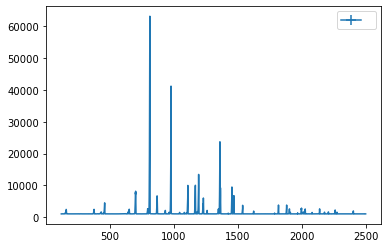

In [11]:
spe = rc2.spectrum.from_local_file(rc2test.prepend_prefix(rc2test.get_filenames(laser_wl=['785'], sample=['Neon'], OP=['03']))[0])
spe.plot()

In [12]:
ref_pos, ref_ampl = np.array([[k, v] for k, v in rc2const.neon_rs_785_nist_dict.items()]).T
ref_ampl

array([ 5.37437266,  0.5689278 ,  3.50109409,  7.20253715,  1.75054705,
        0.52516412,  7.43982495,  1.31209728,  7.94695466, 13.12910284,
        4.37636761,  2.18818381,  4.37636761, 35.01094092, 12.03028296,
        1.75054705,  0.56892779, 30.6345733 ,  0.65645514,  1.31291028,
       17.50547046, 15.31728665, 29.20051774,  4.37636761,  5.6892779 ,
        6.56455142,  1.31291028,  4.37636761, 26.25820569, 17.50547046,
        0.26258206, 13.12910284,  7.43799755,  2.62582057,  0.87527352,
        4.37636761,  5.25164114,  3.93873085,  3.37975271,  0.39387309,
        8.75273523,  3.50109409,  0.35010941,  1.31291028,  3.06345733,
        0.65645514,  2.18818381,  1.31291028,  2.18818381,  2.62582057,
        1.31291028,  5.25164114,  7.87746171,  4.37636761])

1699.92 2499.82 4804
1700.0 2499.0 800


<AxesSubplot:>

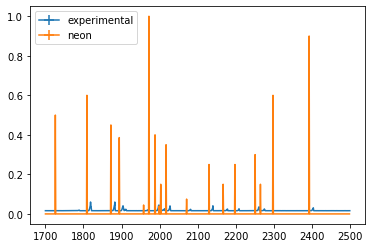

In [13]:
boundaries=(2000-300,2000+500)
cand = spe.find_peak_multipeak(prominence=spe.y_noise*2, sharpening=None)
exp = rc2.spectrum.from_delta_lines(deltas=cand.get_pos_ampl_dict(),xcal=lambda x: x, nbins=3000)
exp = exp.trim_axes(method='x-axis',boundaries=boundaries)
exp.y = exp.y/max(exp.y)

spe.y = spe.y/max(spe.y)
exp  = spe.trim_axes(method='x-axis',boundaries=boundaries)

print(min(exp.x),max(exp.x),len(exp.x))
ax = exp.plot(label='experimental')

ref_neon = rc2.spectrum.from_delta_lines(deltas=rc2const.neon_rs_785_nist_dict,xcal=lambda x: x, nbins=3000)
ref_neon = ref_neon.trim_axes(method='x-axis',boundaries=boundaries)
ref_neon.y = ref_neon.y/max(ref_neon.y)
print(min(ref_neon.x),max(ref_neon.x),len(ref_neon.x))
ref_neon.plot(ax=ax,label='neon')


(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

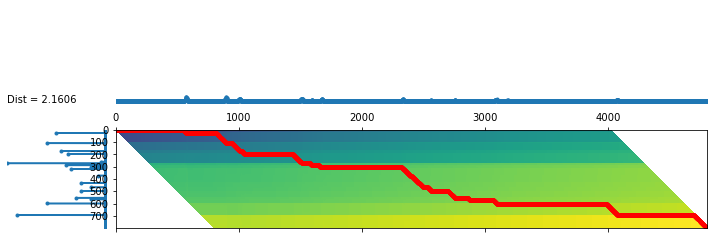

In [25]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
tolerance = 10
d, paths = dtw.warping_paths(ref_neon.y,exp.y,use_pruning=True,window=tolerance)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(ref_neon.y,exp.y, paths, best_path)

In [29]:
for k in best_path:
    print(k)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(0, 33)
(0, 34)
(0, 35)
(0, 36)
(0, 37)
(0, 38)
(0, 39)
(0, 40)
(0, 41)
(0, 42)
(0, 43)
(0, 44)
(0, 45)
(0, 46)
(0, 47)
(0, 48)
(0, 49)
(0, 50)
(0, 51)
(0, 52)
(0, 53)
(0, 54)
(0, 55)
(0, 56)
(0, 57)
(0, 58)
(0, 59)
(0, 60)
(0, 61)
(0, 62)
(0, 63)
(0, 64)
(0, 65)
(0, 66)
(0, 67)
(0, 68)
(0, 69)
(0, 70)
(0, 71)
(0, 72)
(0, 73)
(0, 74)
(0, 75)
(0, 76)
(0, 77)
(0, 78)
(0, 79)
(0, 80)
(0, 81)
(0, 82)
(0, 83)
(0, 84)
(0, 85)
(0, 86)
(0, 87)
(0, 88)
(0, 89)
(0, 90)
(0, 91)
(0, 92)
(0, 93)
(0, 94)
(0, 95)
(0, 96)
(0, 97)
(0, 98)
(0, 99)
(0, 100)
(0, 101)
(0, 102)
(0, 103)
(0, 104)
(0, 105)
(0, 106)
(0, 107)
(0, 108)
(0, 109)
(0, 110)
(0, 111)
(0, 112)
(0, 113)
(0, 114)
(0, 115)
(0, 116)
(0, 117)
(0, 118)
(0, 119)
(0, 120)
(0, 121)
(0, 122)
(0,

<Figure size 432x288 with 0 Axes>

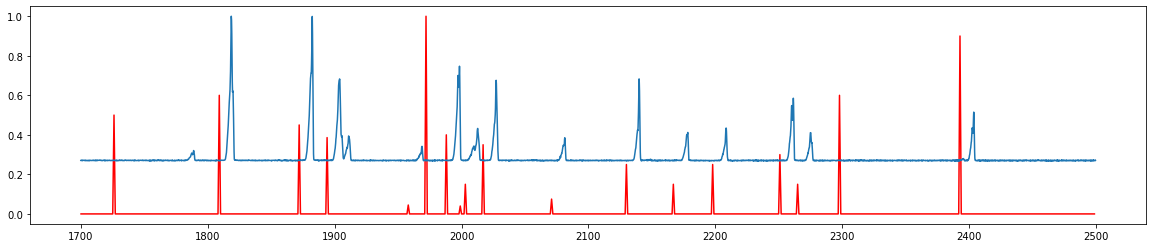

<Figure size 432x288 with 0 Axes>

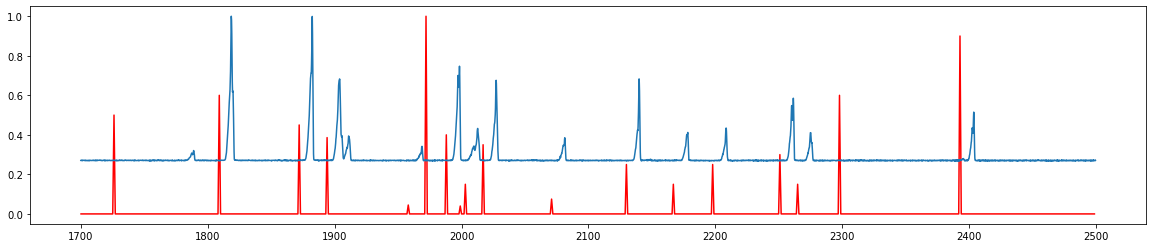

In [28]:
import matplotlib.pyplot as plt
path = best_path
plt.figure()
plt.subplots(figsize=(20, 4))
plt.plot(ref_neon.x,ref_neon.y/max(ref_neon.y),'r')
plt.plot(exp.x,exp.y/max(exp.y))
plt.figure()
plt.subplots(figsize=(20, 4))
plt.plot(ref_neon.x[[k[0] for k in path]],ref_neon.y[[k[0] for k in path]]/max(ref_neon.y),'r')
plt.plot(exp.x[[k[1] for k in path]],exp.y[[k[1] for k in path]]/max(exp.y))